In [1]:
import pandas as pd
import yaml
import pickle
from utilities.utilities import exposure_function, read_ac_data, gdp_from_cdd_exposure, read_projections, add_historical_gdp_growth, calculate_average_gdp_growth
from utilities.plotting import plot_exposure_map, plot_exposure_contour, plot_gdp_increase_map, plot_gdp_increase_scatter

In [2]:
# Load configuration from config.yaml
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

with open('exposure_function_params.pkl', 'rb') as f:
    params = pickle.load(f)

def exposure_new(gdp, cdd):
    return exposure_function(gdp, params['av_a'], params['av_b'], cdd, params['sat_a'], params['sat_b'], params['sat_c'])

INFO:root:No data for ABW in 1980
INFO:root:Found data for ABW in 1986
INFO:root:No data for ALB in 1980
INFO:root:Found data for ALB in 1984
INFO:root:No data for ARM in 1980
INFO:root:Found data for ARM in 1990
INFO:root:No data for ASM in 1980
INFO:root:Found data for ASM in 2002
INFO:root:No data for AZE in 1980
INFO:root:Found data for AZE in 1990
INFO:root:No data for BIH in 1980
INFO:root:Found data for BIH in 1994
INFO:root:No data for BLR in 1980
INFO:root:Found data for BLR in 1990
INFO:root:No data for CEB in 1980
INFO:root:Found data for CEB in 1990
INFO:root:No data for CHI in 1980
INFO:root:Found data for CHI in 1998
INFO:root:No data for CUW in 1980
INFO:root:Found data for CUW in 2011
INFO:root:No data for CYM in 1980
INFO:root:Found data for CYM in 2006
INFO:root:No data for CZE in 1980
INFO:root:Found data for CZE in 1990
INFO:root:No data for DJI in 1980
INFO:root:Found data for DJI in 1985
INFO:root:No data for ECA in 1980
INFO:root:Found data for ECA in 1988
INFO:r

ISO 3 and CDD predictions for scenario ssp1_rcp26
    ISO3  CDD_ssp1_rcp26_2100
0    AFG                  NaN
1    AGO                  NaN
2    ALB                  NaN
3    AND                  NaN
4    ARE                  NaN
5    ARG                713.0
6    ARM                311.0
7    ATG                  NaN
8    AUS               2233.0
9    AUT                267.0
10   AZE                850.0
11   BDI               1437.0
12   BEL                294.0
13   BEN               4006.0
14   BFA               4324.0
15   BGD               3311.0
16   BGR                672.0
17   BHR                  NaN
18   BHS               2601.0
19   BIH                528.0
20   BLR                351.0
21   BLZ               3167.0
22   BOL               2105.0
23   BRA               3123.0
24   BRB                  NaN
25   BRN               3395.0
26   BTN                311.0
27   BWA               2137.0
28   CAF               3186.0
29   CAN                 72.0
30   CHE            

/home/awongel/miniconda3/envs/experiencedT_env/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/awongel/miniconda3/envs/experiencedT_env/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/awongel/miniconda3/envs/experiencedT_env/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/carnegie/nobackup/scratch/awongel/clab_experiencedT/utilities/plotting_classes.py:77: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<Figure size 640x480 with 0 Axes>

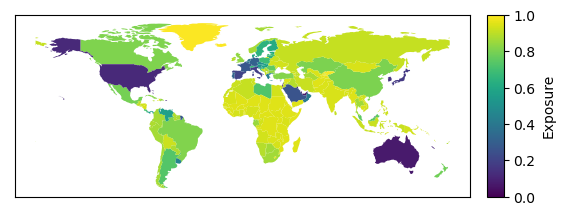

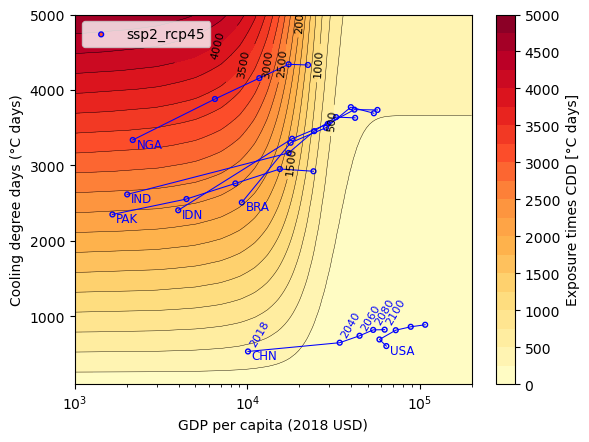

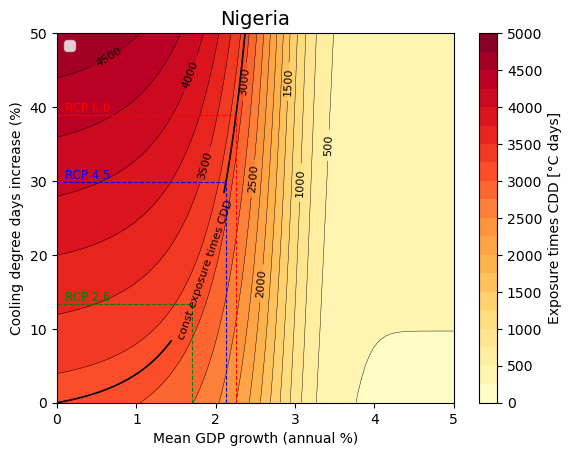

<Figure size 640x480 with 0 Axes>

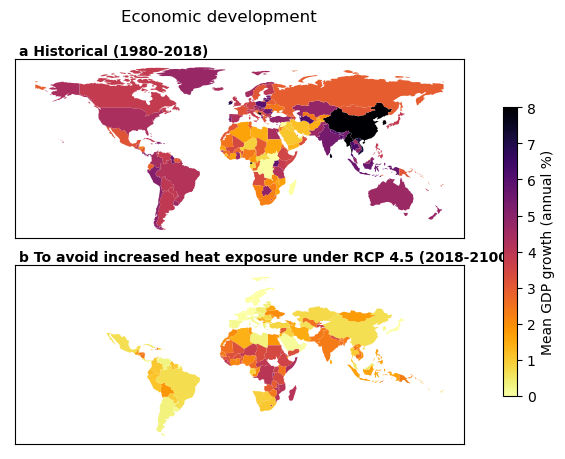

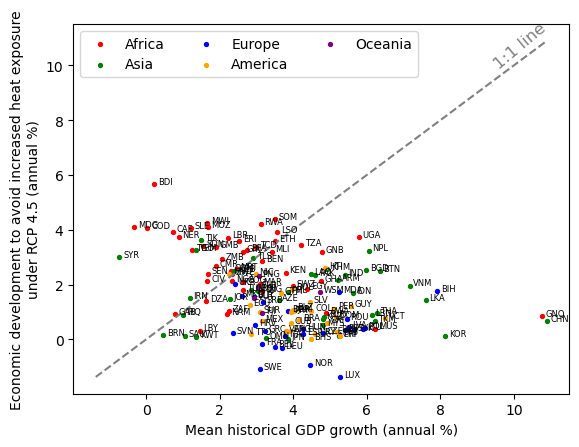

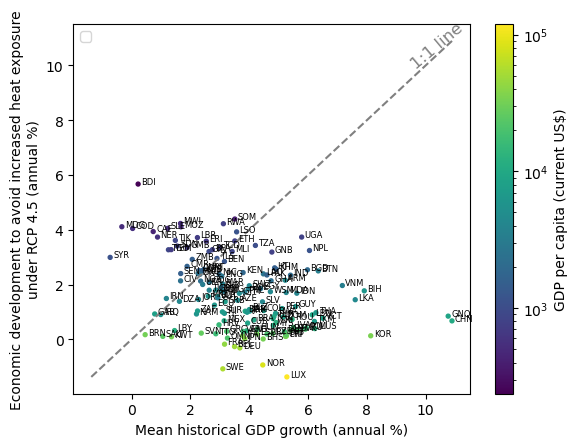

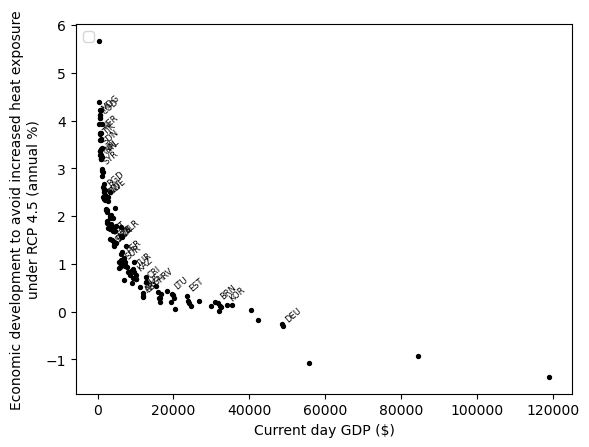

In [10]:
# Read in historical AC, GDP, DD data
ac_data_historical = read_ac_data('data_experiencedT/AC_data.csv')
# Add historical GDP growth
ac_data = add_historical_gdp_growth(ac_data_historical, config)

# Plot exposure map (supporting material)
plot_exposure_map(ac_data_historical, exposure_new)

# Add predictions for DD_mean and GDP for the countries in ac_data
dd_projections = read_projections(config, 'cdd', ac_data_historical)
gdp_projections = read_projections(config, 'gdp', ac_data_historical)

# Merge the two dataframes
merged_projections = pd.merge(dd_projections, gdp_projections, on='ISO3')

# Combine historical and projections into one dataframe
ac_data = pd.merge(ac_data, merged_projections, on='ISO3', how='outer')

# pd.set_option('display.max_rows', None)
# print (ac_data)

# Add column for historical exposure times CDD
ac_data['exposure_times_cdd'] = exposure_new(ac_data['GDP'], ac_data['DD_mean'])*ac_data['DD_mean']

# Plot exposure contour
plot_exposure_contour(config, exposure_new, ac_data, x_y_ranges=[[100, 5000, 100],[1000, 200000, 100]], 
                      name_tag='exposure_contour')

for scenario in config['future_scenarios']:
    # Calculate GDP needed to keep exposure times CDD constant
    print ("ISO 3 and CDD predictions for scenario {}".format(scenario))
    print (ac_data[['ISO3', 'CDD_{0}_{1}'.format(scenario, config['future_years'][-1])]])

    gdp_const = gdp_from_cdd_exposure(ac_data['exposure_times_cdd'], ac_data['CDD_{0}_{1}'.format(scenario, config['future_years'][-1])], params)
    # print("GDP const for scenario {}".format(scenario))
    # print(gdp_const)
    ac_data['gdp_const_{}'.format(scenario)] = calculate_average_gdp_growth(gdp_const, ac_data['GDP'], config['future_years'][-1] - config['ref_year'])

# Plot contour for one country with x and y percent increase in CDD and GDP
plot_exposure_contour(config, exposure_new, ac_data, x_y_ranges=[[0, 50, 100],[0, 5, 100]],
                    country='NGA', name_tag='exposure_contour_country_NGA')


for scenario in [config['base_future_scenario']]:
    plot_gdp_increase_map(config, ac_data, scenario, exposure_new)
    plot_gdp_increase_scatter(config, ac_data, scenario, color_scale='continent')
    plot_gdp_increase_scatter(config, ac_data, scenario, color_scale='gdp')
    plot_gdp_increase_scatter(config, ac_data, scenario, color_scale='vs_gdp')
